In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import truncnorm
from scipy import stats

In [15]:
df = pd.read_csv('data.csv')
df

,Prime Production (km2)
0,29.1
1,47.0
2,88.8
3,102.8
4,85.0
...,...
222,0.0
223,11.3
224,57.8
225,33.2


In [16]:
column_name = 'Prime Production (km2)'
data = df[column_name]

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(data)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print(f"The data in column '{column_name}' is not normally distributed (p-value = {p_value})")
else:
    print(f"The data in column '{column_name}' is normally distributed (p-value = {p_value})")

The data in column 'Prime Production (km2)' is not normally distributed (p-value = 1.0900325780882625e-11)


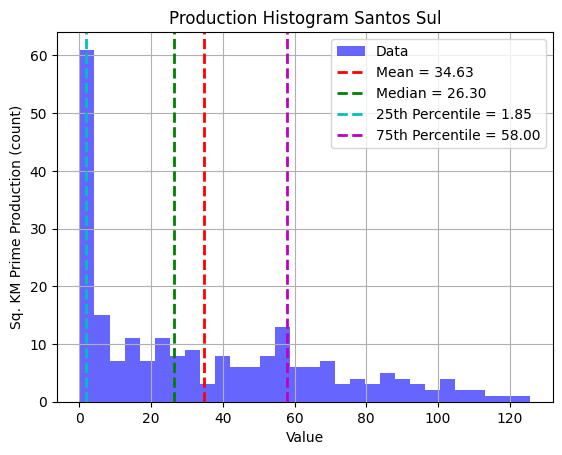

In [24]:
# Create a histogram
plt.hist(data, bins=30, density=False, alpha=0.6, color='b', label='Data')

# Calculate mean, median, and desired percentiles (e.g., 25th and 75th percentiles)
mean_value = data.mean()
median_value = data.median()
percentile_25 = np.percentile(data, 25)
percentile_75 = np.percentile(data, 75)

# Annotate mean, median, and percentiles as text annotations
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f'Mean = {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2, label=f'Median = {median_value:.2f}')
plt.axvline(percentile_25, color='c', linestyle='dashed', linewidth=2, label=f'25th Percentile = {percentile_25:.2f}')
plt.axvline(percentile_75, color='m', linestyle='dashed', linewidth=2, label=f'75th Percentile = {percentile_75:.2f}')

# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Sq. KM Prime Production (count)')
plt.title('Production Histogram Santos Sul')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

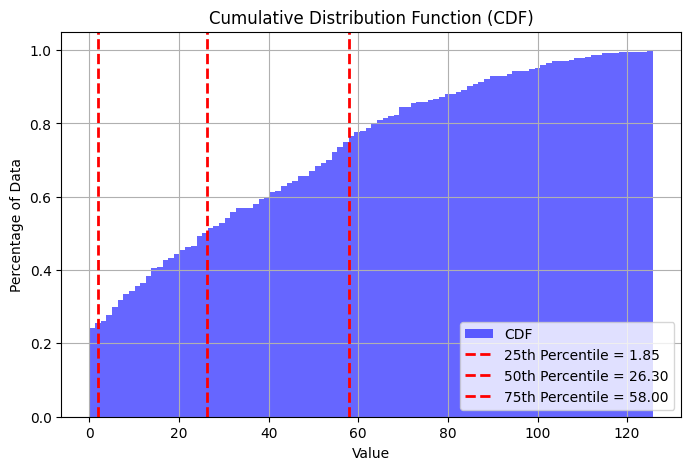

In [25]:

# Calculate specific percentiles (e.g., 25th, 50th, and 75th percentiles)
percentiles = [25, 50, 75]
percentile_values = np.percentile(data, percentiles)

# Create a CDF plot
plt.figure(figsize=(8, 5))
plt.hist(data, bins=100, cumulative=True, density=True, alpha=0.6, color='b', label='CDF')
plt.xlabel('Value')
plt.ylabel('Percentage of Data')
plt.title('Cumulative Distribution Function (CDF)')

# Annotate specific percentiles on the plot
for p, value in zip(percentiles, percentile_values):
    plt.axvline(value, color='r', linestyle='dashed', linewidth=2, label=f'{p}th Percentile = {value:.2f}')

# Add labels and a legend
plt.legend(loc='lower right')
plt.grid(True)

# Show the CDF plot
plt.show()

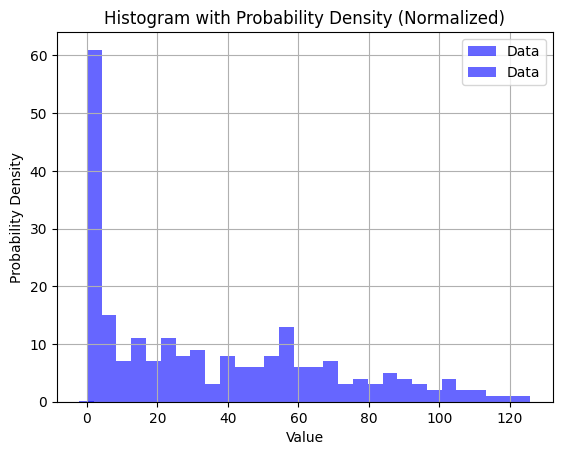

In [21]:
# Create a histogram without density normalization
hist_values, bin_edges, _ = plt.hist(data, bins=30, alpha=0.6, color='b', label='Data')

# Calculate the area under the histogram and scale it to 1
bin_widths = bin_edges[1:] - bin_edges[:-1]
area_under_histogram = sum(hist_values * bin_widths)
normalized_hist_values = hist_values / area_under_histogram

# Create a probability density histogram
plt.bar(bin_edges[:-1], normalized_hist_values, width=bin_widths, alpha=0.6, color='b', label='Data')

# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Probability Density')  # Label the y-axis as Probability Density
plt.title('Histogram with Probability Density (Normalized)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

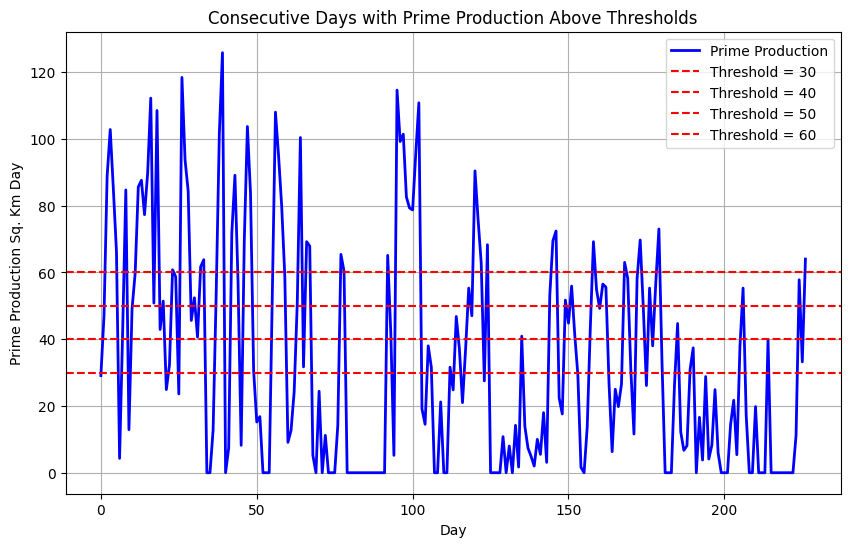

In [27]:
# Define the thresholds
thresholds = [30, 40, 50, 60]

# Initialize a figure
plt.figure(figsize=(10, 6))

# Plot the prime production data
plt.plot(data, label='Prime Production', color='blue', linewidth=2)

# Add horizontal lines for each threshold
for threshold in thresholds:
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')

# Customize the plot
plt.xlabel('Day')
plt.ylabel('Prime Production Sq. Km Day')
plt.title('Consecutive Days with Prime Production Above Thresholds')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

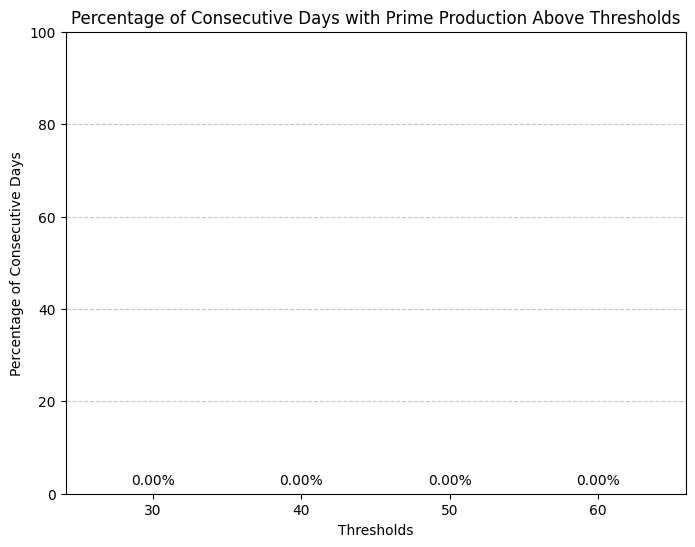

In [31]:
column_name = 'Prime Production (km2)'
data = df[column_name]

# Define the thresholds
thresholds = [30, 40, 50, 60]

# Initialize a list to store the percentage values
percentage_values = []

# Calculate the percentage of consecutive days above each threshold
for threshold in thresholds:
    consecutive_count = 0
    total_days = 0
    for value in data:
        if value > threshold:
            consecutive_count += 1
        else:
            consecutive_count = 0  # Reset count if value drops below threshold
        if consecutive_count >= threshold:
            total_days += 1
    percentage = (total_days / len(data)) * 100
    percentage_values.append(percentage)
    
# Create a bar chart to visualize the percentage values
plt.figure(figsize=(8, 6))
plt.bar([str(threshold) for threshold in thresholds], percentage_values, color='skyblue')
plt.xlabel('Thresholds')
plt.ylabel('Percentage of Consecutive Days')
plt.title('Percentage of Consecutive Days with Prime Production Above Thresholds')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100%

# Display percentage values on top of the bars
for i, percentage in enumerate(percentage_values):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


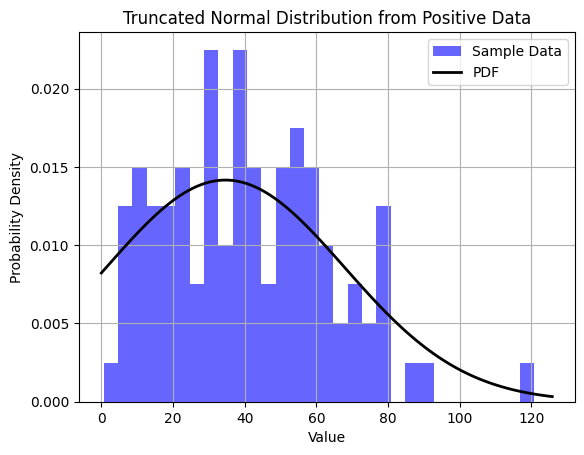

In [12]:
# Set the mean and standard deviation of the truncated normal distribution
mean = np.mean(df)
std_dev = np.std(df)

# Define the lower and upper bounds for the truncated distribution (positive values)
lower_bound = 0.0
upper_bound = np.max(df)

# Create a truncated normal distribution
a = (lower_bound - mean) / std_dev
b = (upper_bound - mean) / std_dev
truncated_distribution = truncnorm(a, b, loc=mean, scale=std_dev)

# Generate random numbers following the truncated normal distribution
num_samples = 100  # You can change this to the desired number of samples
samples = truncated_distribution.rvs(size=num_samples)

# Create a histogram to visualize the distribution
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', label='Sample Data')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Truncated Normal Distribution from Positive Data')
plt.legend()
plt.grid(True)

# Plot the probability density function (PDF) of the truncated normal distribution
x = np.linspace(lower_bound, upper_bound, 100)
pdf = truncated_distribution.pdf(x)
plt.plot(x, pdf, 'k', linewidth=2, label='PDF')
plt.legend()

plt.show()